# Entrega 4
en este trabajo quiero ver que tanto hay más playlist largas que cortas y lo mismo con las canciones, para ver si la gente prefiere contenido extenso o más acortado a la hora de escuchar música.
1. Categorizar y contar playlist Largas > 50 u cortas. Por qué? segun distintos vlogs en internet (no encontré la fuente original del que todas la sacan) el punto dulce de una playlist está máximo a 50 canciones.
2. Lo mismo pero con las canciones, a partir de un histograma para hayar el punto que separa las canciones largas de las cortas. Y de paso responder a la pregunta: ¿en que rango de minutos se encuentran mayormente distribuidas las canciones?
3. ¿cuál es el promedio de duración de las canciones cortas? ¿Cuál es el promedio de duración de las canciones largas?
4. ¿Qué tanto siguen en promedio más las playlist largas que las cortas o viceversa?
5. ¿existe relación entre la duración de las canciones en las playlists y los seguidores de estas?

In [42]:
import sqlite3
%reload_ext sql
import sql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
from google.colab import drive
drive.mount('/content/drive')
%sql sqlite://///content/drive/MyDrive/Colab/music_smaller.db.db
conn = sqlite3.connect('/content/drive/MyDrive/Colab/music_smaller.db.db')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables

,name
0,slice_time
1,playlists
2,song


Cantidad de playlists largas: 3883
Cantidad de playlists cortas: 4117


<ipython-input-107-80ee1cdfe5f9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='length_category', data=df, palette='pastel')


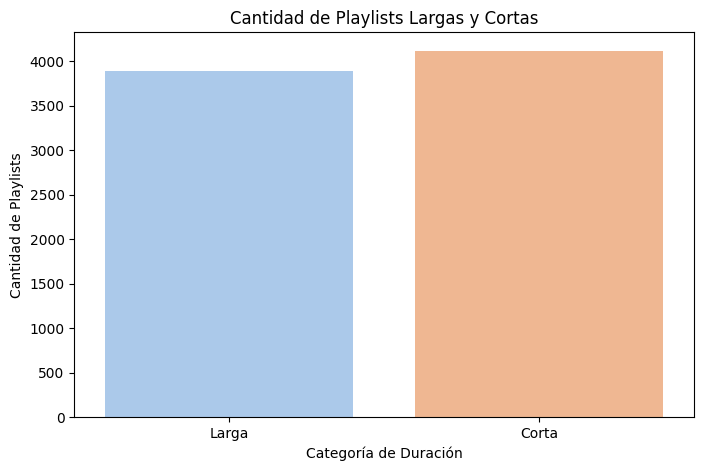

In [107]:
# Definir la función para clasificar las playlists como largas o cortas
def clasificar_playlist(num_tracks):
    if num_tracks > 50:
        return 'Larga'
    else:
        return 'Corta'

# Aplicar la función a cada fila del DataFrame para obtener la categoría de duración
df['length_category'] = df['num_tracks'].apply(clasificar_playlist)

# Contar la cantidad de playlists largas y cortas
cantidad_playlists_largas = df[df['length_category'] == 'Larga'].shape[0]
cantidad_playlists_cortas = df[df['length_category'] == 'Corta'].shape[0]

# Imprimir los resultados
print("Cantidad de playlists largas:", cantidad_playlists_largas)
print("Cantidad de playlists cortas:", cantidad_playlists_cortas)

# Generar un gráfico de barras para visualizar la cantidad de playlists largas y cortas
plt.figure(figsize=(8, 5))
sns.countplot(x='length_category', data=df, palette='pastel')
plt.title('Cantidad de Playlists Largas y Cortas')
plt.xlabel('Categoría de Duración')
plt.ylabel('Cantidad de Playlists')
plt.show()



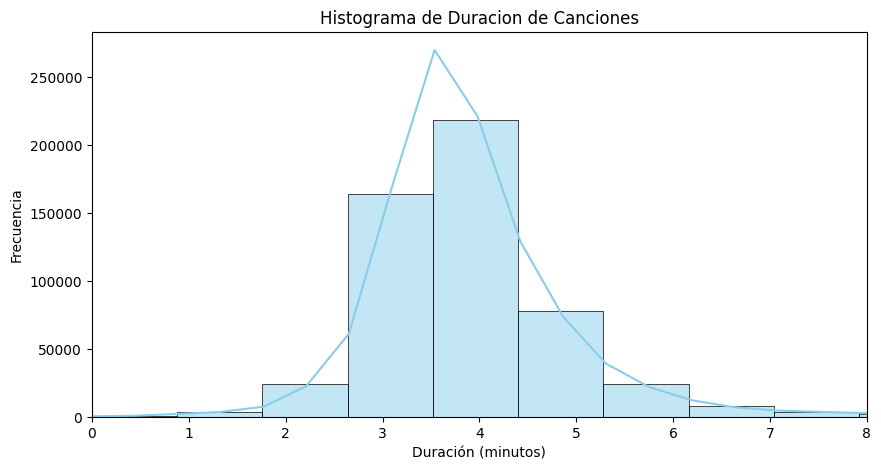

In [94]:
# Generar un histograma de las duraciones de las canciones
plt.figure(figsize=(10, 5))
sns.histplot(df['duration_minutes'], bins=100, kde=True, color='skyblue')
plt.title('Histograma de Duracion de Canciones')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.xlim(0, 8)  # Reemplaza 10 con el valor máximo de escala que deseas en el eje X

plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Tablas en la base de datos:          name
0  slice_time
1   playlists
2        song
                              track_uri  pid  pos  \
0  spotify:track:4SDywo3ykB2PEthjXvo1UP    6    0   
1  spotify:track:229SqGbacrLSBfb9XfJczF    6    1   
2  spotify:track:0orNm6qQT2B5WFi0l7l3PV    6    2   
3  spotify:track:1hWQvA6oGVJ2mAVsZ59AaV    6    3   
4  spotify:track:56SkdBKyR2zOkjk6wVFI9s    6    4   

                             artist_name  \
0           Creedence Clearwater Revival   
1                                 STRFKR   
2                                    311   
3  Nathaniel Rateliff & The Night Sweats   
4                                Toadies   

                              artist_uri              track_name  \
0  spotify:artist:3IYUhFvPQItj6xySrBmZkd    I Put A Spell On You   
1  spotify:artist:2Tz1DTzVJ5Gyh8ZwVr6ekU           Bury Us Alive   

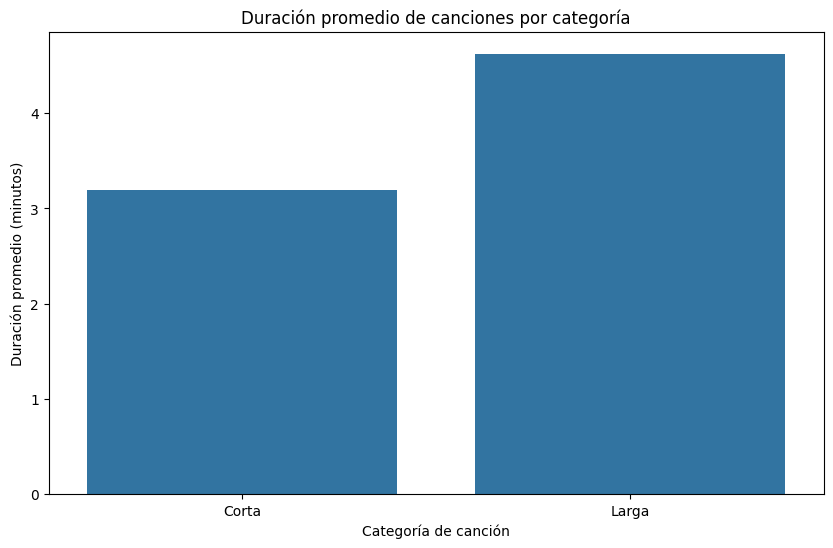

In [93]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Conectar a la base de datos
conn = sqlite3.connect('/content/drive/MyDrive/Colab/music_smaller.db.db')

# Leer los nombres de las tablas
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tablas en la base de datos:", tables)

# Leer los datos de la tabla 'song' en un DataFrame
query = "SELECT * FROM song"
df = pd.read_sql_query(query, conn)

# Mostrar las primeras filas del DataFrame
print(df.head())

# Mostrar los nombres de las columnas del DataFrame
print("Columnas en la tabla 'song':", df.columns)

# Convertir la duración de milisegundos a minutos
df['duration_minutes'] = df['duration_ms'] / 60000

# Definir un umbral para categorizar las canciones como "cortas" o "largas"
threshold = df['duration_minutes'].median()

# Categorizar las canciones
df['length_category'] = df['duration_minutes'].apply(lambda x: 'Corta' if x < threshold else 'Larga')

# Calcular la duración promedio para cada categoría
average_durations = df.groupby('length_category')['duration_minutes'].mean().reset_index()

# Cerrar la conexión
conn.close()

# Generar un gráfico de barras para visualizar las duraciones promedio
plt.figure(figsize=(10, 6))
sns.barplot(x='length_category', y='duration_minutes', data=average_durations)
plt.title('Duración promedio de canciones por categoría')
plt.xlabel('Categoría de canción')
plt.ylabel('Duración promedio (minutos)')
plt.show()


In [38]:
# Verificar las columnas presentes en el DataFrame df
print(df.columns)

# Verificar las columnas presentes en el DataFrame df_reproducciones
print(df_reproducciones.columns)


Index(['track_uri', 'pid', 'pos', 'artist_name', 'artist_uri', 'track_name',
       'album_uri', 'duration_ms', 'album_name', 'duration_minutes',
       'length_category'],
      dtype='object')
Index(['slice', 'generated_on', 'version'], dtype='object')


la moda de las canciones está entorno a los tres minutos y medio, mientras que las canciones suelen estar mayormente distribuidas en el intervalo entre dos minutos y cuarentaicinco segundos aproximadamente y cuatro minutos y veinticinto segundos.

Promedio de seguidores para playlists largas: 6.058975019314962
Promedio de seguidores para playlists cortas: 2.000971581248482


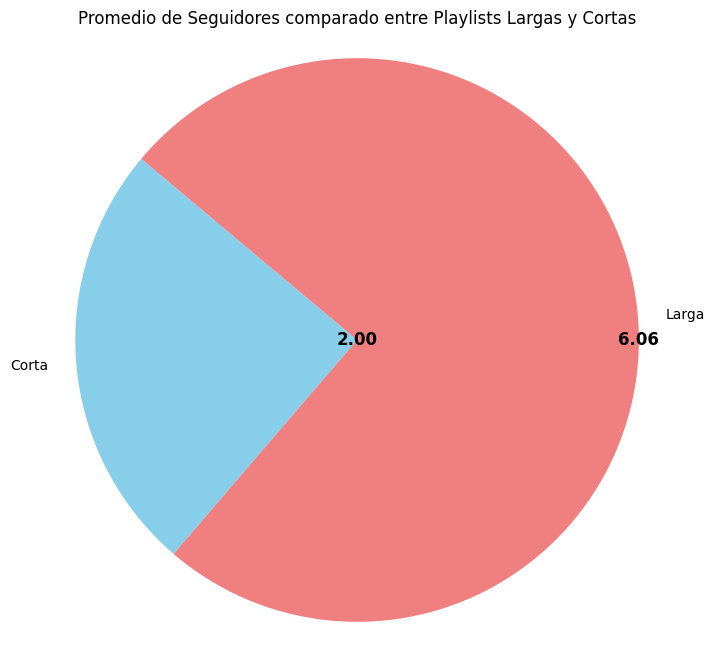

In [114]:
# Calcular el promedio de seguidores para cada categoría de duración
promedio_seguidores = df.groupby('length_category')['num_followers'].mean()

# Imprimir los resultados
print("Promedio de seguidores para playlists largas:", promedio_seguidores['Larga'])
print("Promedio de seguidores para playlists cortas:", promedio_seguidores['Corta'])

# Configurar el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(promedios, labels=categorias, colors=['skyblue', 'lightcoral'], startangle=140)
plt.title('Promedio de Seguidores comparado entre Playlists Largas y Cortas')
plt.axis('equal')  # Hace que el gráfico sea circular

# Mostrar el número de seguidores promedio dentro de cada porción del pastel
for i, (categoria, promedio) in enumerate(zip(categorias, promedios)):
    plt.text(i, 0, f'{promedio:.2f}', ha='center', va='center', fontsize=12, color='black', fontweight='bold')

plt.show()



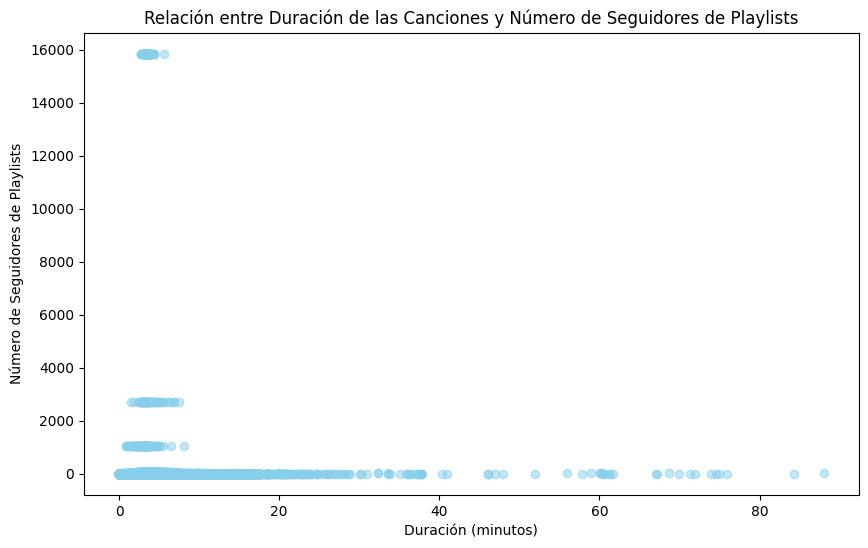

In [134]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Conectar a la base de datos
conn = sqlite3.connect('/content/drive/MyDrive/Colab/music_smaller.db.db')

# Leer los datos de las canciones y las playlists en un DataFrame
query = '''
SELECT s.duration_ms, p.num_followers
FROM song s
JOIN playlists p ON s.pid = p.pid
'''
df = pd.read_sql_query(query, conn)

# Cerrar la conexión
conn.close()

# Convertir la duración de milisegundos a minutos para facilitar la visualización
df['duration_minutes'] = df['duration_ms'] / 60000

# Graficar la relación entre la duración de las canciones y el número de seguidores de las playlists
plt.figure(figsize=(10, 6))
plt.scatter(df['duration_minutes'], df['num_followers'], alpha=0.5, color='skyblue')
plt.title('Relación entre Duración de las Canciones y Número de Seguidores de Playlists')
plt.xlabel('Duración (minutos)')
plt.ylabel('Número de Seguidores de Playlists')
plt.show()






Las playlist con canciones más cortas suelen tener más seguidores

# A modo de conclusión, podria decir que si hay una relación entre la duración de las playlist y las canciones en ellas con la cantidad de seguidores que tienen, siendo que las playlist muy largas no son tan seguidas, mientras que las cortas si lo son.